In [1]:
cd C:\Users\eyyup\OneDrive\Desktop\DTU_Fall_18\Machine Learning\Project 3

C:\Users\eyyup\OneDrive\Desktop\DTU_Fall_18\Machine Learning\Project 3


In [2]:
# exercise 6.1.2
from sklearn import preprocessing
from sklearn import utils
from matplotlib.pyplot import figure, plot, xlabel, ylabel, legend, show, boxplot
from sklearn import model_selection, tree
import numpy as np
from Toolbox_Python.Scripts.Tools.toolbox_02450 import clusterplot
from sklearn.cluster import k_means

In [45]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import pandas as pd
import numpy as np
df = pd.read_excel('DataSet.xlsx')
%matplotlib inline
df = df[(df.temp<=1) & (df.temp>0) & (df.atemp<=1) & (df.atemp>=0) & (df.hum<=1) & (df.hum>=0) & (df.windspeed <=1)]
sub_df = df[['hum', 'temp', 'windspeed', 'mnth', 'new', 'weathersit', 'atemp', 'total']]
sub_df.head()

,hum,temp,windspeed,mnth,new,weathersit,atemp,total
0,0.805833,0.344167,0.160446,1,331,2,0.363625,985
1,0.696087,0.363478,0.248539,1,131,2,0.353739,801
2,0.437273,0.196364,0.248309,1,120,1,0.189405,1349
3,0.590435,0.001389,0.160296,1,108,1,0.212122,1562
5,0.518261,0.204348,0.089565,1,88,1,0.233209,1606


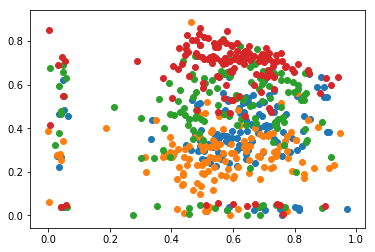

In [46]:
X = sub_df.as_matrix()
mat_data = X
y = df[['season']].as_matrix().ravel()
attributeNames = [name for name in list(sub_df)]
sub_df.head()
plt.scatter(sub_df[y ==4].hum, sub_df[y ==4].temp)

plt.scatter(sub_df[y ==1].hum, sub_df[y ==1].temp)

plt.scatter(sub_df[y ==2].hum, sub_df[y ==2].temp)

plt.scatter(sub_df[y ==3].hum, sub_df[y ==3].temp)


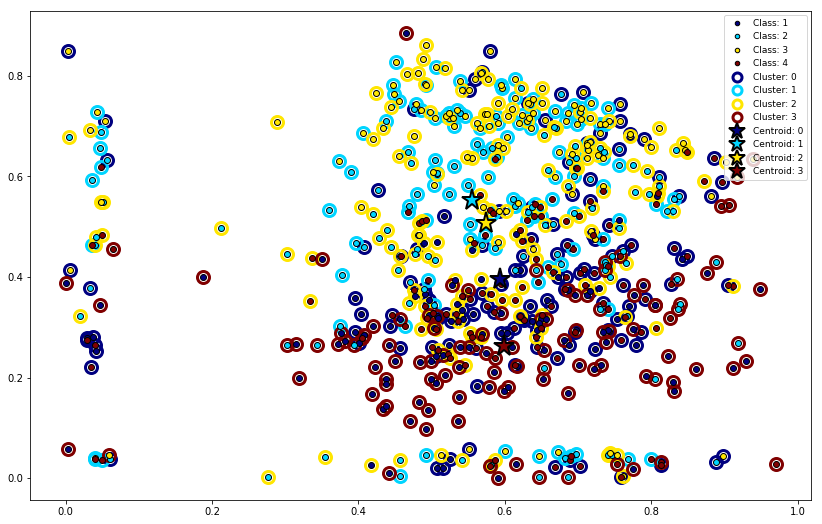

Ran Exercise 10.1.1


In [47]:
N, M = X.shape
C = len(attributeNames)

# Number of clusters:
K = 4

# K-means clustering:
centroids, cls, inertia = k_means(X,K)
    
# Plot results:
figure(figsize=(14,9))
clusterplot(X, cls, centroids, y)
plt.show()

print('Ran Exercise 10.1.1')

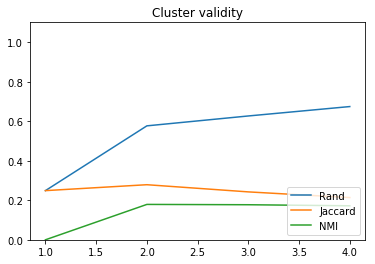

Ran Exercise 10.1.3


In [59]:
from matplotlib.pyplot import figure, title, plot, ylim, legend, show
import numpy as np
from scipy.io import loadmat
from Toolbox_Python.Scripts.Tools.toolbox_02450 import clusterval
from sklearn.cluster import k_means
# Maximum number of clusters:
K = 4

# Allocate variables:
Rand = np.zeros((K,))
Jaccard = np.zeros((K,))
NMI = np.zeros((K,))

for k in range(K):
    # run K-means clustering:
    #cls = Pycluster.kcluster(X,k+1)[0]
    centroids, cls, inertia = k_means(X,k+1)
    # compute cluster validities:
    Rand[k], Jaccard[k], NMI[k] = clusterval(y,cls)    
        
# Plot results:

figure(1)
title('Cluster validity')
plot(np.arange(K)+1, Rand)
plot(np.arange(K)+1, Jaccard)
plot(np.arange(K)+1, NMI)
ylim(0,1.1)
legend(['Rand', 'Jaccard', 'NMI'], loc=4)
show()

print('Ran Exercise 10.1.3')

In [60]:
Rand

array([ 0.24874743,  0.57645434,  0.62646923,  0.67403315])

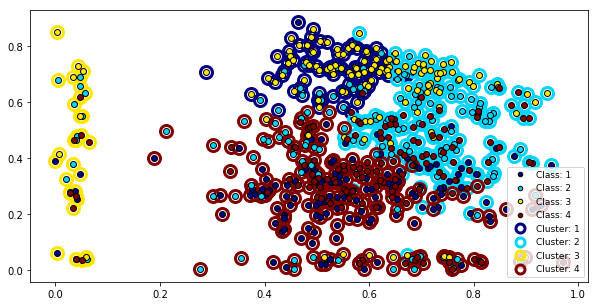

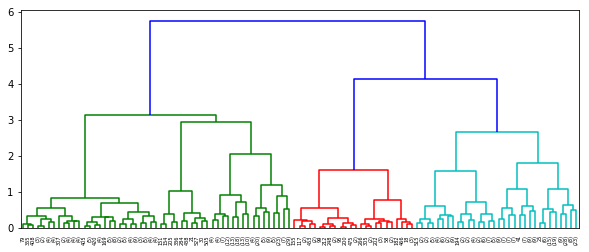

Ran Exercise 10.2.1


In [100]:
from matplotlib.pyplot import figure, show
from scipy.io import loadmat
from Toolbox_Python.Scripts.Tools.toolbox_02450 import clusterplot
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
# Perform hierarchical/agglomerative clustering on data matrix
#Method = 'single'
Method = 'ward'
Metric = 'euclidean'

Z = linkage(X, method=Method, metric=Metric)

# Compute and display clusters by thresholding the dendrogram
Maxclust = 4
cls = fcluster(Z, criterion='maxclust', t=Maxclust)
figure(1)
clusterplot(X, cls.reshape(cls.shape[0],1), y=y)

# Display dendrogram
max_display_levels=6
figure(2,figsize=(10,4))
dendrogram(Z, truncate_mode='level', p=max_display_levels)

show()

print('Ran Exercise 10.2.1')

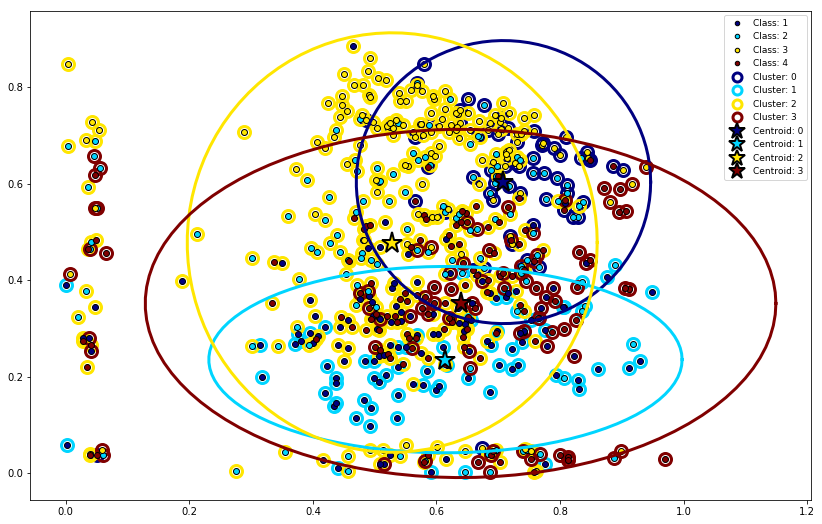

Ran Exercise 11.1.1


In [51]:
from matplotlib.pyplot import figure, show
import numpy as np
from scipy.io import loadmat
from Toolbox_Python.Scripts.Tools.toolbox_02450 import clusterplot
from sklearn.mixture import GaussianMixture
N, M = X.shape
C = 3
# Number of clusters
K = 4
#cov_type = 'full'       
cov_type = 'diag'       
# type of covariance, you can try out 'diag' as well
reps = 1                
# number of fits with different initalizations, best result will be kept
# Fit Gaussian mixture model
gmm = GaussianMixture(n_components=K, covariance_type=cov_type, n_init=reps).fit(X)
cls = gmm.predict(X)    
# extract cluster labels
cds = gmm.means_        
# extract cluster centroids (means of gaussians)
covs = gmm.covariances_
# extract cluster shapes (covariances of gaussians)
if cov_type.lower() == 'diag':
    new_covs = np.zeros([K,M,M])    
    
    count = 0    
    for elem in covs:
        temp_m = np.zeros([M,M])
        new_covs[count] = np.diag(elem)
        count += 1

    covs = new_covs

# Plot results:
# figure(figsize=(14,9))
# clusterplot(X, clusterid=cls, centroids=cds, y=y, covars=covs)
# show()

# In case the number of features != 2, then a subset of features most be plotted instead.
figure(figsize=(14,9))
idx = [0,1] # feature index, choose two features to use as x and y axis in the plot
clusterplot(X[:,idx], clusterid=cls, centroids=cds[:,idx], y=y, covars=covs[:,idx,:][:,:,idx])
show()

print('Ran Exercise 11.1.1')

Fitting model for K=1
Fitting model for K=2
Fitting model for K=3
Fitting model for K=4
Fitting model for K=5
Fitting model for K=6
Fitting model for K=7
Fitting model for K=8
Fitting model for K=9
Fitting model for K=10


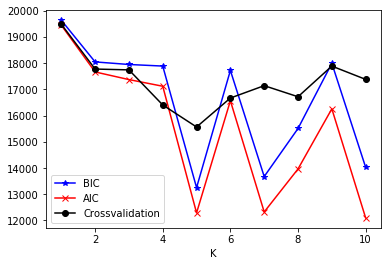

Ran Exercise 11.1.5


In [56]:
from matplotlib.pyplot import figure, plot, legend, xlabel, show
import numpy as np
from scipy.io import loadmat
from sklearn.mixture import GaussianMixture
from sklearn import model_selection
N, M = X.shape
C = 7


# Range of K's to try
KRange = range(1,11)
T = len(KRange)

covar_type = 'full'     # you can try out 'diag' as well
reps = 3                # number of fits with different initalizations, best result will be kept

# Allocate variables
BIC = np.zeros((T,))
AIC = np.zeros((T,))
CVE = np.zeros((T,))

# K-fold crossvalidation
CV = model_selection.KFold(n_splits=10,shuffle=True)

for t,K in enumerate(KRange):
        print('Fitting model for K={0}'.format(K))

        # Fit Gaussian mixture model
        gmm = GaussianMixture(n_components=K, covariance_type=covar_type, n_init=reps).fit(X)

        # Get BIC and AIC
        BIC[t,] = gmm.bic(X)
        AIC[t,] = gmm.aic(X)

        # For each crossvalidation fold
        for train_index, test_index in CV.split(X):

            # extract training and test set for current CV fold
            X_train = X[train_index]
            X_test = X[test_index]

            # Fit Gaussian mixture model to X_train
            gmm = GaussianMixture(n_components=K, covariance_type=covar_type, n_init=reps).fit(X_train)

            # compute negative log likelihood of X_test
            CVE[t] += -gmm.score_samples(X_test).sum()
            

# Plot results

figure(1); 
plot(KRange, BIC,'-*b')
plot(KRange, AIC,'-xr')
plot(KRange, 2*CVE,'-ok')
legend(['BIC', 'AIC', 'Crossvalidation'])
xlabel('K')
show()

print('Ran Exercise 11.1.5')

In [58]:
import numpy as np
from matplotlib.pyplot import figure, bar, title, show
from scipy.stats.kde import gaussian_kde
c_sizes = np.random.multinomial(N, [1./3, 1./3, 1./3])
for c_id, c_size in enumerate(c_sizes):
    X[c_sizes.cumsum()[c_id]-c_sizes[c_id]:c_sizes.cumsum()[c_id],:] = np.random.normal(m[c_id], np.sqrt(s[c_id]), (c_size,M))
X[-1,0]=-10 # added outlier


# Compute kernel density estimate
kde = gaussian_kde(X.ravel())

scores = kde.evaluate(X.ravel())
idx = scores.argsort()
scores.sort()

print('The index of the lowest density object: {0}'.format(idx[0]))

# Plot kernel density estimate
figure()
bar(range(20),scores[:20])
title('Outlier score')
show()

print('Ran Exercise 11.3.1')

TypeError: 'int' object is not subscriptable

/Users/BotezatuCristian/Desktop/ML_project2/Tools/toolbox_02450.py:577: RuntimeWarning: divide by zero encountered in log
  log_density = -np.log(N-1)-M/2*np.log(2*np.pi*width)+np.log(sQ)


Optimal estimated width is: 0.25
Lowest density: [9.5176725e-10] for data object: 459


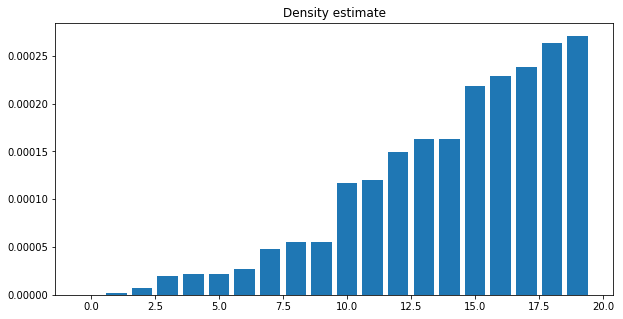

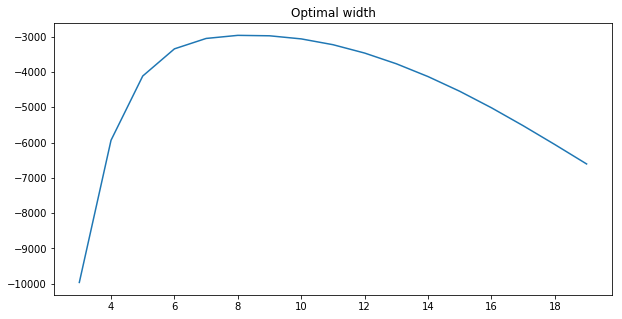

Ran Exercise 11.3.2


In [105]:
import numpy as np
from matplotlib.pyplot import figure, bar, title, plot, show
from toolbox_02450 import gausKernelDensity
c_sizes = np.random.multinomial(N, [1./3, 1./3, 1./3])
for c_id, c_size in enumerate(c_sizes):
    X[c_sizes.cumsum()[c_id]-c_sizes[c_id]:c_sizes.cumsum()[c_id],:] = np.random.normal(m[c_id], np.sqrt(s[c_id]), (c_size,M))



# Estimate the optimal kernel density width, by leave-one-out cross-validation
widths = 2.0**np.arange(-10,10)
logP = np.zeros(np.size(widths))
for i,w in enumerate(widths):
    f, log_f = gausKernelDensity(X, w)
    logP[i] = log_f.sum()
val = logP.max()
ind = logP.argmax()

width=widths[ind]
print('Optimal estimated width is: {0}'.format(width))

# Estimate density for each observation not including the observation
# itself in the density estimate
density, log_density = gausKernelDensity(X, width)

# Sort the densities
i = (density.argsort(axis=0)).ravel()
density = density[i]

# Display the index of the lowest density data object
print('Lowest density: {0} for data object: {1}'.format(density[0],i[0]))

# Plot density estimate of outlier score
figure(1)
bar(range(20),density[:20].reshape(-1,))
title('Density estimate')
figure(2)
plot(logP)
title('Optimal width')
show()

print('Ran Exercise 11.3.2')